# Inicialização dataset - Task [001]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftfy import fix_text
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# open the csv file with pandas and read it into a dataframe
df = pd.read_csv('../datasets/WineDataset.csv')
df2 = pd.read_csv('../datasets/XWines_Full_100K_wines.csv')
df3 = pd.read_csv('../datasets/merged_wine_dataset.csv')

In [3]:
# print all the information about the dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1290 non-null   object 
 1   Description                1286 non-null   object 
 2   Price                      1290 non-null   object 
 3   Capacity                   1290 non-null   object 
 4   Grape                      1275 non-null   object 
 5   Secondary Grape Varieties  488 non-null    object 
 6   Closure                    1279 non-null   object 
 7   Country                    1284 non-null   object 
 8   Unit                       1281 non-null   float64
 9   Characteristics            1253 non-null   object 
 10  Per bottle / case / each   1290 non-null   object 
 11  Type                       1285 non-null   object 
 12  ABV                        1281 non-null   object 
 13  Region                     1124 non-null   objec

,Unit
count,1281.000000
mean,10.177674
std,2.318850
min,0.000000
25%,9.400000
50%,10.100000
75%,10.500000
max,39.000000


In [4]:
# print all the information about the dataframe
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100646 entries, 0 to 100645
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WineID      100646 non-null  int64  
 1   WineName    100646 non-null  object 
 2   Type        100646 non-null  object 
 3   Elaborate   100646 non-null  object 
 4   Grapes      100646 non-null  object 
 5   Harmonize   100646 non-null  object 
 6   ABV         100646 non-null  float64
 7   Body        100646 non-null  object 
 8   Acidity     100646 non-null  object 
 9   Code        100646 non-null  object 
 10  Country     100646 non-null  object 
 11  RegionID    100646 non-null  int64  
 12  RegionName  100646 non-null  object 
 13  WineryID    100646 non-null  int64  
 14  WineryName  100646 non-null  object 
 15  Website     82779 non-null   object 
 16  Vintages    100646 non-null  object 
dtypes: float64(1), int64(3), object(13)
memory usage: 13.1+ MB


,WineID,ABV,RegionID,WineryID
count,100646.000000,100646.000000,100646.000000,100646.000000
mean,150387.308755,13.268421,1738.085955,41316.599756
std,29095.984572,1.472526,495.235850,18359.726909
min,100001.000000,0.000000,1000.000000,10000.000000
25%,125183.250000,12.500000,1327.000000,24375.250000
50%,150374.500000,13.400000,1710.000000,41826.500000
75%,175591.750000,14.000000,2058.000000,57550.000000
max,200795.000000,50.000000,3750.000000,71840.000000


In [5]:
# print all the information about the dataframe
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WineName                   222 non-null    object 
 1   WineryName                 222 non-null    object 
 2   Description                221 non-null    object 
 3   Price                      222 non-null    object 
 4   Capacity                   222 non-null    object 
 5   Grape                      222 non-null    object 
 6   Secondary Grape Varieties  73 non-null     object 
 7   Closure                    222 non-null    object 
 8   Country                    222 non-null    object 
 9   Unit                       222 non-null    float64
 10  Characteristics            218 non-null    object 
 11  Per bottle / case / each   222 non-null    object 
 12  Type                       222 non-null    object 
 13  ABV                        222 non-null    object 

,Unit,Vintage
count,222.000000,222.000000
mean,10.445045,2019.094595
std,1.663978,2.542858
min,4.300000,2007.000000
25%,10.100000,2018.000000
50%,10.500000,2020.000000
75%,10.900000,2021.000000
max,21.800000,2022.000000


In [6]:
# fix text using ftfy
# fix all the columns except when the column is a float
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

# fix text using ftfy
# fix all the columns except when the column is a float
for col in df2.columns:
    if df2[col].dtype == 'object': 
        df2[col] = df2[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

In [7]:
# view all the unique values for each column except for the columns:'Title' 'Description', 'Country', 'Unit' 'Region' 'Appellation'
for col in df.columns:
    if col not in ['Title', 'Description', 'Country', 'Unit', 'Region', 'Appellation']:
        print(col, df[col].unique())

Price ['£9.99 per bottle' '£15.99 per bottle' '£12.49 per bottle'
 '£17.99 per bottle' '£300.00 per bottle' '£12.99 per bottle'
 '£80.00 per bottle' '£13.99 per bottle' '£8.99 per bottle'
 '£11.99 per bottle' '£46.99 per bottle' '£11.29 per bottle'
 '£22.99 per bottle' '£45.99 per bottle' '£49.99 per bottle'
 '£33.99 per bottle' '£23.99 per bottle' '£21.99 per bottle'
 '£42.99 per bottle' '£29.99 per bottle' '£39.99 per bottle'
 '£14.99 per bottle' '£16.99 per bottle' '£7.99 per bottle'
 '£18.99 per bottle' '£19.99 per bottle' '£10.99 per bottle'
 '£34.99 per bottle' '£43.99 per bottle' '£24.99 per bottle'
 '£35.99 per bottle' '£37.99 per bottle' '£99.99 per bottle'
 '£75.99 per bottle' '£79.00 per case' '£61.99 per bottle'
 '£57.99 per bottle' '£20.99 per bottle' '£44.99 per bottle'
 '£36.99 per bottle' '£69.99 per bottle' '£25.99 per bottle'
 '£6.99 per bottle' '£48.99 per bottle' '£13.00 per bottle'
 '£93.99 per bottle' '£26.99 per bottle' '£49.00 per case'
 '£59.94 per case' '£200.

In [8]:
for col in df3.columns:
    if col not in ['WineName', 'WineryName', 'Grape', 'Secondary Grape Varieties', 'Country', 'Region', 'Appellation', 'Style', 'Characteristics', 'Description']:
        print(col, df3[col].unique())

Price ['£15.99 per bottle' '£17.99 per bottle' '£14.99 per bottle'
 '£12.99 per bottle' '£18.99 per bottle' '£16.99 per bottle'
 '£22.99 per bottle' '£29.99 per bottle' '£21.99 per bottle'
 '£34.99 per bottle' '£13.99 per bottle' '£11.29 per bottle'
 '£11.99 per bottle' '£9.99 per bottle' '£31.99 per bottle'
 '£26.99 per bottle' '£42.99 per bottle' '£37.99 per bottle'
 '£19.99 per bottle' '£32.99 per bottle' '£24.99 per bottle'
 '£79.99 per bottle' '£39.99 per bottle' '£54.99 per bottle'
 '£69.99 per bottle' '£33.99 per bottle' '£99.00 per bottle'
 '£84.99 per bottle' '£23.99 per bottle' '£188.99 per bottle'
 '£49.99 per bottle' '£64.99 per bottle' '£44.99 per bottle'
 '£85.00 per bottle' '£59.99 per bottle' '£12.49 per bottle'
 '£52.99 per bottle' '£30.99 per bottle' '£45.99 per bottle'
 '£89.99 per bottle' '£27.99 per bottle' '£7.99 per bottle'
 '£10.99 per bottle' '£169.99 per bottle' '£72.99 per bottle'
 '£20.99 per bottle' '£60.99 per bottle' '£75.99 per bottle'
 '£25.99 per bottl

# Limpeza de dados
- Remoção de valores nulos
- Normalização de valores
- Remoção de colunas desnecessárias

In [9]:
# Print wine where wineid 131027
print(df2.loc[df2['WineID'] == 131027])

#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity'

one_hot_encoded_df = pd.get_dummies(df2, columns=['Type','Body','Acidity','Elaborate'], prefix=['Type','Body','Acidity','Elaborate'])

# Binary Encoding for the column 'Country', 'RegionName', 'Grapes', 'Harmonize'

encoder = BinaryEncoder(cols=['Grapes', 'Harmonize'], return_df=True)
binary_encoded_df = encoder.fit_transform(df2)

encoded_df = pd.concat([one_hot_encoded_df, binary_encoded_df], axis=1)

# Normalize the 'ABV' column using MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the 'ABV' column
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])


encoded_df = encoded_df.drop(columns=df2.columns)	
encoded_df = encoded_df.dropna()

# Display the updated DataFrame
print(encoded_df)


       WineID           WineName  Type         Elaborate  \
31005  131027  Rosé Alcohol Free  Rosé  Assemblage/Blend   

                         Grapes  \
31005  ['Chardonnay', 'Merlot']   

                                               Harmonize  ABV           Body  \
31005  ['Beef', 'Pork', 'Game Meat', 'Rich Fish', 'Ve...  0.0  Medium-bodied   

      Acidity Code Country  RegionID RegionName  WineryID   WineryName  \
31005  Medium   FR  France      1327  Languedoc     25983  Pierre Zero   

                           Website  \
31005  https://www.pierre-zero.com   

                                                Vintages  
31005  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...  


C:\Users\Sistrade\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


        Type_Dessert  Type_Dessert/Port  Type_Red  Type_Rosé  Type_Sparkling  \
0              False              False     False      False            True   
1              False              False      True      False           False   
2              False              False      True      False           False   
3              False              False     False      False           False   
4              False              False      True      False           False   
...              ...                ...       ...        ...             ...   
100641         False              False     False      False           False   
100642          True              False     False      False           False   
100643         False              False     False      False           False   
100644         False              False     False      False           False   
100645         False              False      True      False           False   

        Type_White  Body_Full-bodied  B

# Classification Dataset Preprocessing - Task [066]
### Normalizing Harmonize and grouping it into broader categories

In [10]:
# Replace dishes with their broader categories in the Harmonize column
df2['Harmonize'] = df2['Harmonize'].apply(eval)
dish_to_category = {
    'Beef': 'Meat', 'Lamb': 'Meat', 'Pork': 'Meat', 'Veal': 'Meat', 'Game Meat': 'Meat',
    'Duck': 'Meat', 'Ham': 'Meat', 'Cold Cuts': 'Meat', 'Cured Meat': 'Meat',
    'Poultry': 'Poultry', 'Chicken': 'Poultry',
    'Rich Fish': 'Fish & Seafood', 'Lean Fish': 'Fish & Seafood', 'Shellfish': 'Fish & Seafood',
    'Seafood': 'Fish & Seafood', 'Sushi': 'Fish & Seafood', 'Sashimi': 'Fish & Seafood',
    'Codfish': 'Fish & Seafood', 'Fish': 'Fish & Seafood', 'Grilled': 'Fish & Seafood',
    'Soft Cheese': 'Cheese', 'Hard Cheese': 'Cheese', 'Blue Cheese': 'Cheese',
    'Maturated Cheese': 'Cheese', 'Goat Cheese': 'Cheese', 'Mild Cheese': 'Cheese',
    'Medium-cured Cheese': 'Cheese', 'Cheese': 'Cheese',
    'Pasta': 'Pasta', 'Tagliatelle': 'Pasta', 'Lasagna': 'Pasta',
    'Paella': 'Fish & Seafood', 'Pizza' : 'Pasta',
    'Vegetarian': 'Vegetarian & Vegan', 'Mushrooms': 'Vegetarian & Vegan', 'Salad': 'Vegetarian & Vegan',
    'Fruit': 'Vegetarian & Vegan', 'Tomato Dishes': 'Vegetarian & Vegan', 'Beans': 'Vegetarian & Vegan',
    'Eggplant Parmigiana': 'Vegetarian & Vegan', 'Light Stews': 'Vegetarian & Vegan',
    'Appetizer': 'Appetizers & Snacks', 'Snack': 'Appetizers & Snacks',
    'Aperitif': 'Appetizers & Snacks', 'French Fries': 'Appetizers & Snacks', 'Baked Potato': 'Appetizers & Snacks',
    'Cream': 'Appetizers & Snacks',
    'Sweet Dessert': 'Desserts', 'Fruit Dessert': 'Desserts', 'Citric Dessert': 'Desserts',
    'Cake': 'Desserts', 'Chocolate': 'Desserts', 'Cookies': 'Desserts',
    'Chestnut': 'Desserts', 'Spiced Fruit Cake': 'Desserts', 'Dessert': 'Desserts',
    'Soufflé': 'Desserts', 'Dried Fruits': 'Desserts',
    'Spicy Food': 'Spicy Food', 'Curry Chicken': 'Spicy Food', 'Asian Food': 'Spicy Food', 'Yakissoba': 'Spicy Food',
    'Barbecue': 'Meat', 'Roast': 'Meat'
}

columns = df2.columns
new_harmonize = df2.copy()
new_harmonize['Harmonize'] = df2['Harmonize'].apply(lambda x: list(set(dish_to_category.get(dish, dish) for dish in x)))

# Expand the Harmonize column into multiple rows, one for each dish
new_harmonize = new_harmonize.explode('Harmonize')

# Reset the index for consistency and remove any rows with 'Risotto' because it has a number of insignificant occurrences
new_harmonize.reset_index(drop=True, inplace=True)
new_harmonize = new_harmonize[new_harmonize['Harmonize'].apply(lambda x: 'Risotto' not in x)]
df2 = new_harmonize.copy()

# Get the unique dishes
unique_categories = df2['Harmonize'].unique()

# One-hot encoding
for dish in unique_categories:
    new_harmonize[f'Harmonize_{dish}'] = new_harmonize['Harmonize'].apply(lambda x: x == dish)
# Turn new_harmonize into a harmonize dataframe
new_harmonize = new_harmonize.drop(columns=columns)


### Normalizing the rest of the columns

In [11]:
#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity'
one_hot_encoded_df = pd.get_dummies(df2, columns=['Type', 'Elaborate', 'Body', 'Acidity'])

# Binary Encoding for the column 'Grapes'
encoder = BinaryEncoder(cols=['Grapes'], return_df=True)
binary_encoded_df = encoder.fit_transform(df2)

encoded_df = one_hot_encoded_df.copy()

# Maximum ABV value
print(encoded_df['ABV'].min())
print(encoded_df['ABV'].max())

# get the row where the abv is min
print(encoded_df[encoded_df['ABV'] == encoded_df['ABV'].min()])


# Normalizing the 'ABV' column
scaler = MinMaxScaler()
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])


# Dropping unnecessary columns
encoded_df = encoded_df.drop(columns=['Country', 'RegionName', 'Code', 'WineName', 'WineID', 'Vintages', 'Website', 'WineryID', 'WineryName', 'RegionID','Grapes','Harmonize'])
encoded_df = encoded_df.dropna()
# add new_harmonize to the encoded_df
encoded_df = pd.concat([encoded_df, new_harmonize], axis=1)

C:\Users\Sistrade\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


0.0
50.0
        WineID                               WineName  \
2583    101082                   Espumante Sem Álcool   
2584    101082                   Espumante Sem Álcool   
2585    101082                   Espumante Sem Álcool   
2586    101082                   Espumante Sem Álcool   
23773   108785          Eins Zwei Zero Sparkling Rosé   
23774   108785          Eins Zwei Zero Sparkling Rosé   
23775   108785          Eins Zwei Zero Sparkling Rosé   
23776   108785          Eins Zwei Zero Sparkling Rosé   
26323   109551     Eins Zwei Zero Summer Alcohol Free   
26324   109551     Eins Zwei Zero Summer Alcohol Free   
26325   109551     Eins Zwei Zero Summer Alcohol Free   
26326   109551     Eins Zwei Zero Summer Alcohol Free   
26327   109551     Eins Zwei Zero Summer Alcohol Free   
26328   109551     Eins Zwei Zero Summer Alcohol Free   
51233   118468  Bourgogne Côte Chalonnaise Chardonnay   
51234   118468  Bourgogne Côte Chalonnaise Chardonnay   
51235   118468  Bourgo

### Boxplot

<Axes: xlabel='ABV'>

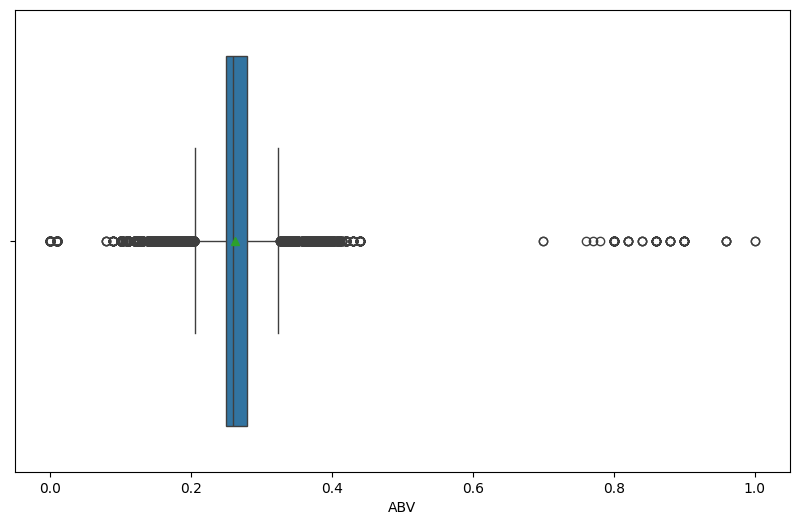

In [12]:
# Calculate the IQR
numeric_df = encoded_df['ABV']
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3 - q1

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=numeric_df, showmeans=True, orient="h")

Analyzing the resulting boxplot, we observe that some values fall outside the ranges but are still relevant, as 0% alcohol wines, including dealcoholized varieties, remain within the wine category. These options retain the essence of traditional wines without alcohol. Additionally, beverages like firewater, with higher alcohol content, can also bring value to the project.

### Correlation Matrix

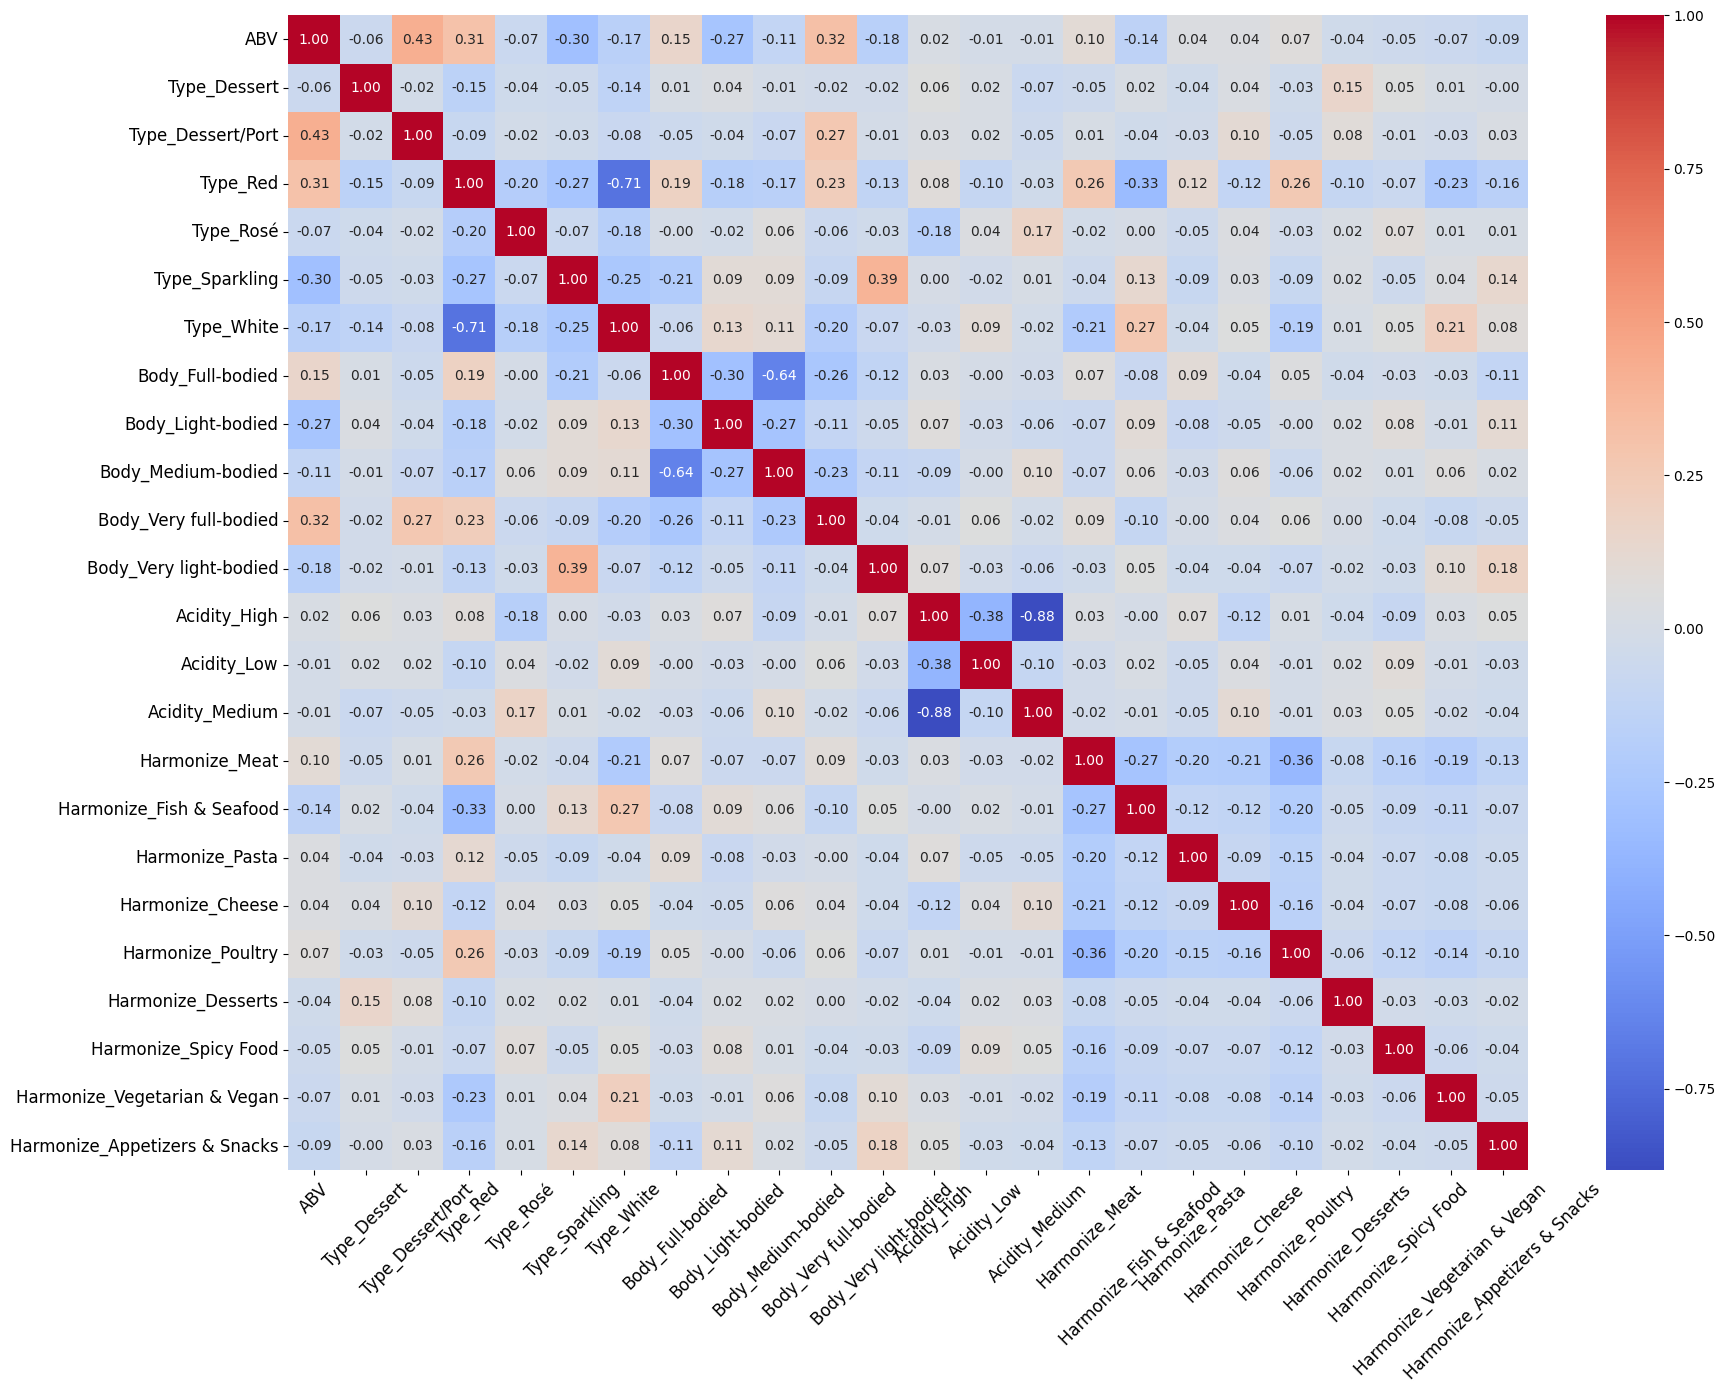

In [13]:
# Compute the correlation matrix without the Elaborate columns to reduce the size of the heatmap
elaborate_columns = encoded_df.columns[encoded_df.columns.str.startswith('Elaborate_')]
matrix_df = encoded_df.drop(columns=elaborate_columns)
correlation_matrix = matrix_df.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    annot_kws={"size": 10}
)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Analyzing the matrix, we observe that it is relatively ‘cold,’ meaning it exhibits a low correlation index overall. Despite the generally low correlations between features, certain specific relationships do stand out. For instance, some dishes in the ‘Harmonize’ category show a notable correlation with particular wines, while certain body characteristics correlate with the alcohol by volume (ABV) and wine types.

### PCA

Generating PCA plot for label column: Harmonize_Meat


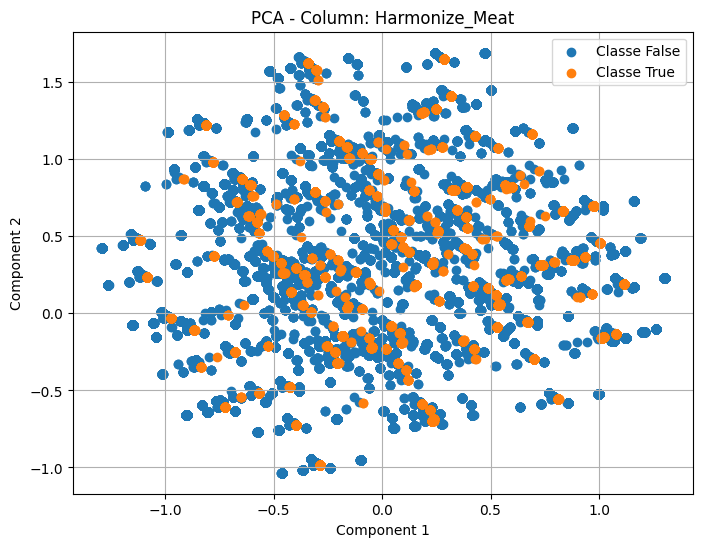

Generating PCA plot for label column: Harmonize_Fish & Seafood


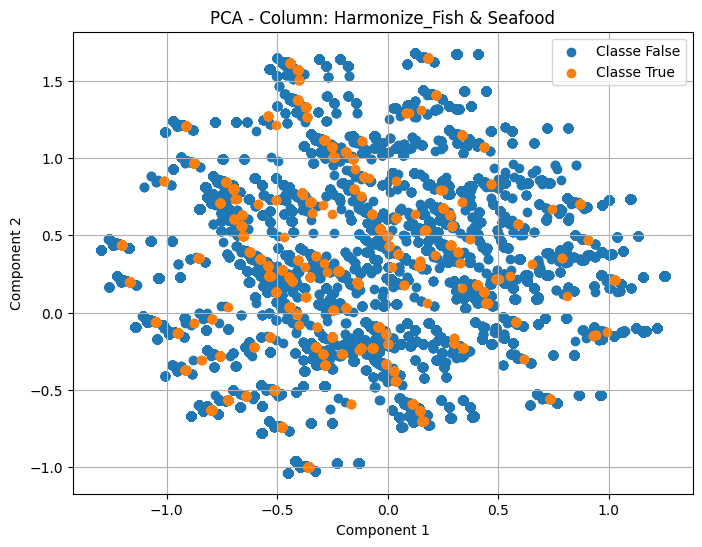

Generating PCA plot for label column: Harmonize_Pasta


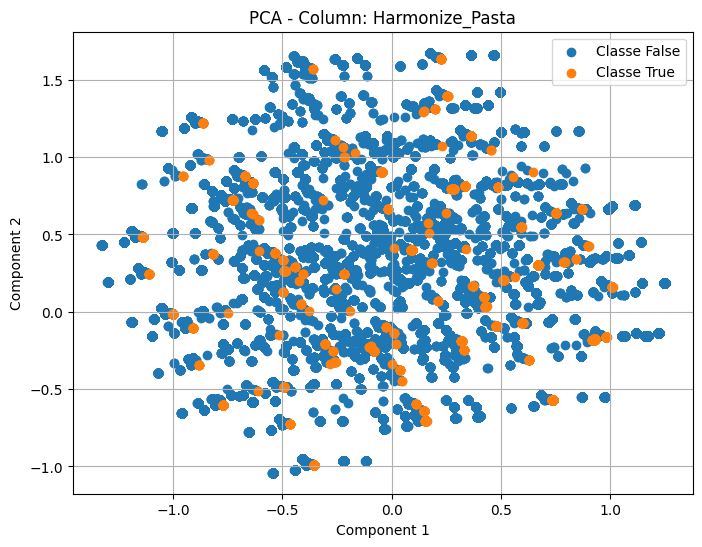

Generating PCA plot for label column: Harmonize_Cheese


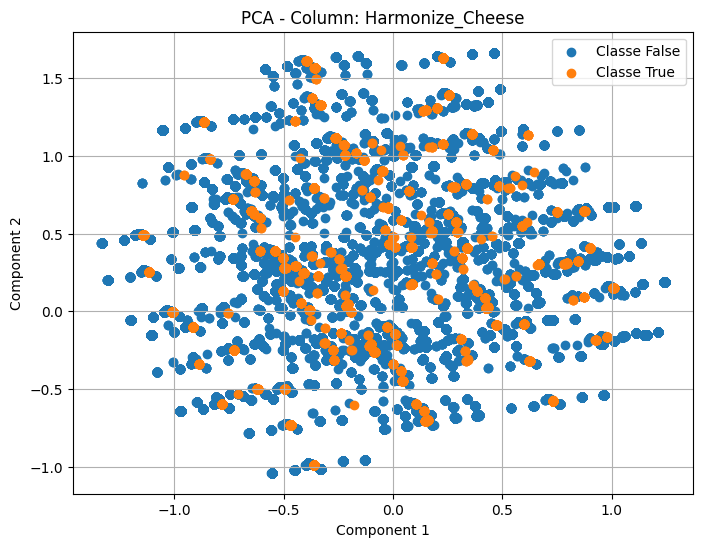

Generating PCA plot for label column: Harmonize_Poultry


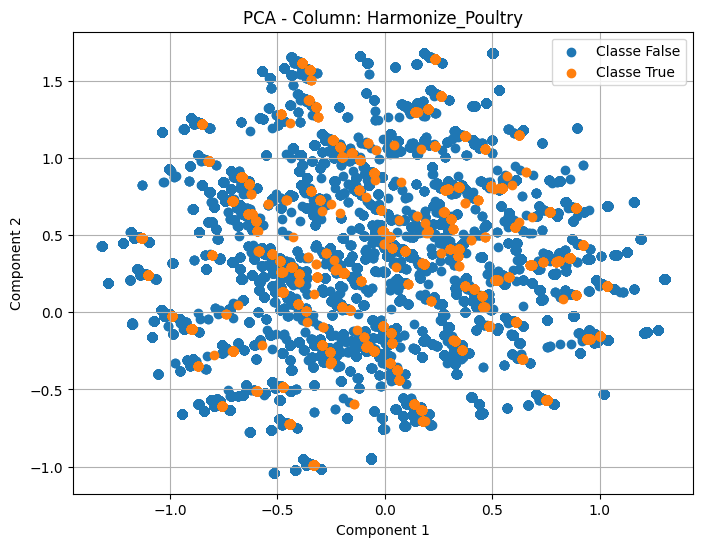

Generating PCA plot for label column: Harmonize_Desserts


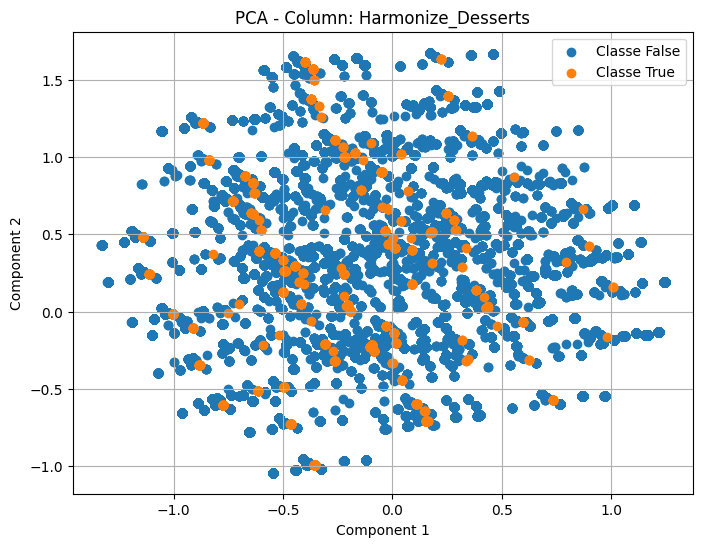

Generating PCA plot for label column: Harmonize_Spicy Food


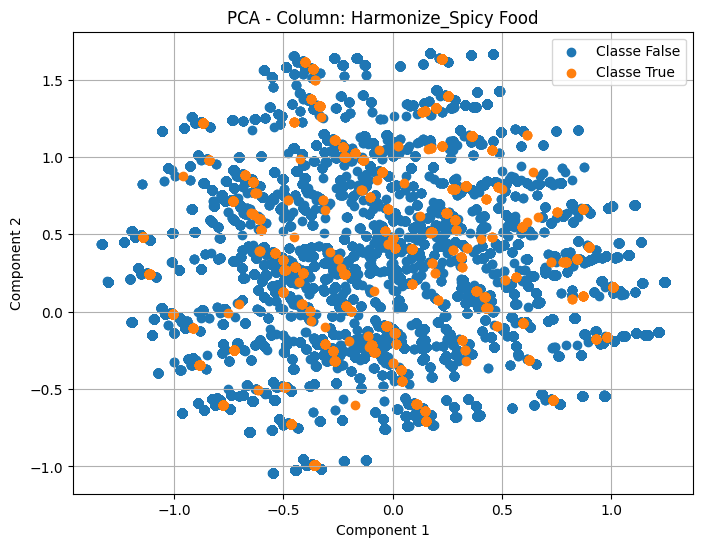

Generating PCA plot for label column: Harmonize_Vegetarian & Vegan


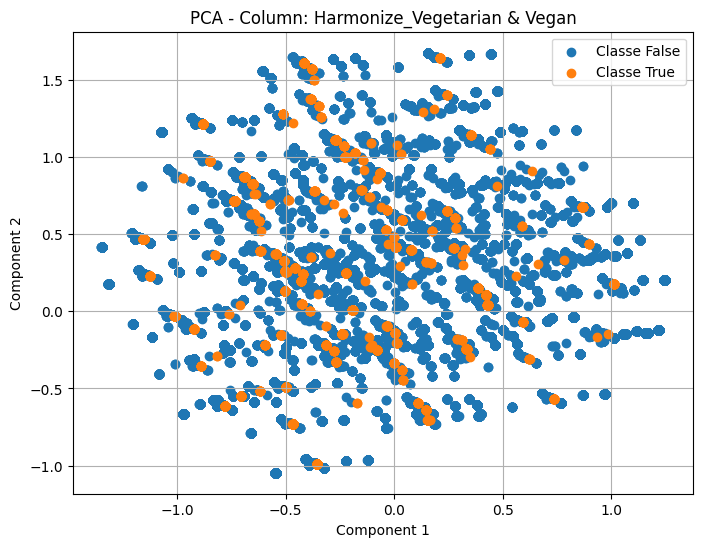

Generating PCA plot for label column: Harmonize_Appetizers & Snacks


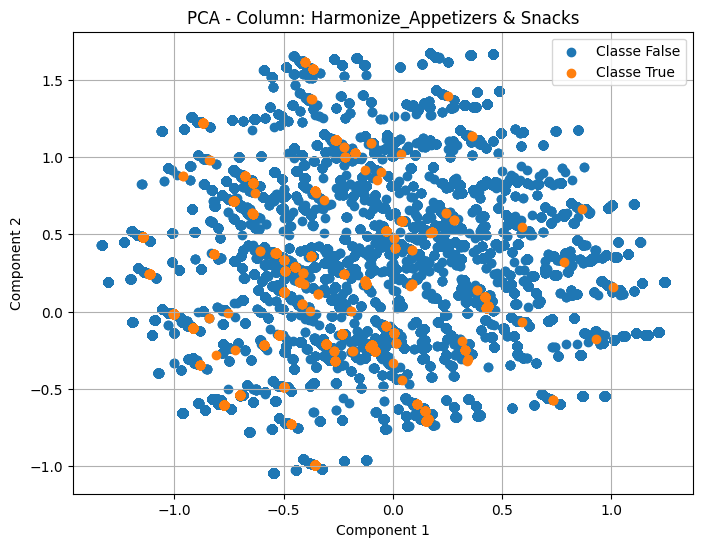

In [14]:
from sklearn.decomposition import PCA

harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]

# Loop through each 'harmonize_' column and perform PCA
for label_col in harmonize_columns:
    print(f"Generating PCA plot for label column: {label_col}")

    features = encoded_df.drop(columns=[label_col])
    labels = encoded_df[label_col].values

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(
            df_pca[labels == label, 0], 
            df_pca[labels == label, 1], 
            label=f'Classe {label}'
        )

    plt.title(f'PCA - Column: {label_col}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid()
    plt.show()

When applying PCA to identify patterns and relationships among the different categories in the ‘Harmonize’ column, we encountered inconclusive results. The resulting plots showed the various categories exhibiting similar patterns, with data points widely scattered across the graphical space rather than concentrated in specific zones.

# Wine Type Prediction using Random Forest Classifier: Model Performance & Results - Task [089]

Training model for target: Type_Dessert
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Type_Dessert: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Results for Type_Dessert:
Accuracy: 0.8241
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.82      0.90     19662
        True       0.10      0.86      0.19       468

    accuracy                           0.82     20130
   macro avg       0.55      0.84      0.54     20130
weighted avg       0.98      0.82      0.88     20130



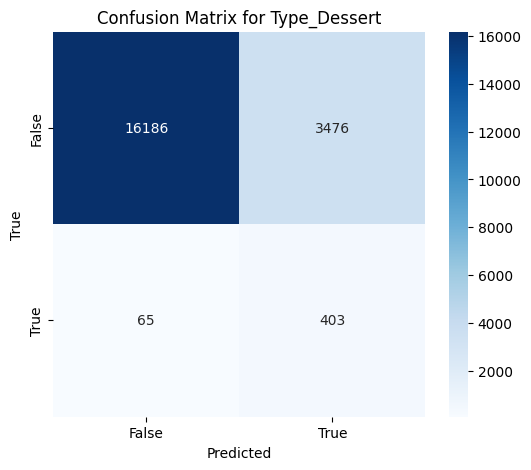

Training model for target: Type_Dessert/Port
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Type_Dessert/Port: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Results for Type_Dessert/Port:
Accuracy: 0.9765
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.98      0.99     19929
        True       0.29      0.96      0.45       201

    accuracy                           0.98     20130
   macro avg       0.65      0.97      0.72     20130
weighted avg       0.99      0.98      0.98     20130



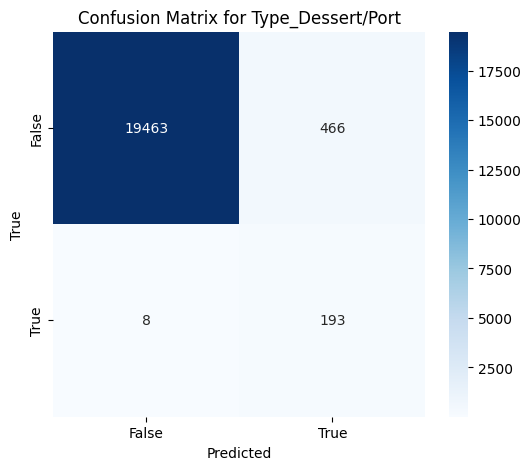

Training model for target: Type_Red
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Type_Red: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Results for Type_Red:
Accuracy: 0.9627
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.95      0.96      8757
        True       0.96      0.97      0.97     11373

    accuracy                           0.96     20130
   macro avg       0.96      0.96      0.96     20130
weighted avg       0.96      0.96      0.96     20130



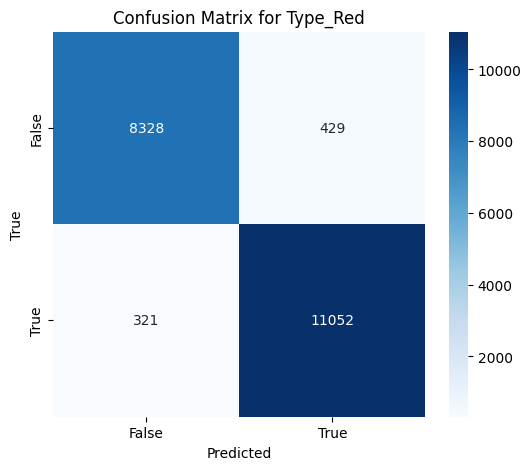

Training model for target: Type_Rosé
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Type_Rosé: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Results for Type_Rosé:
Accuracy: 0.9177
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     19238
        True       0.34      0.95      0.51       892

    accuracy                           0.92     20130
   macro avg       0.67      0.93      0.73     20130
weighted avg       0.97      0.92      0.94     20130



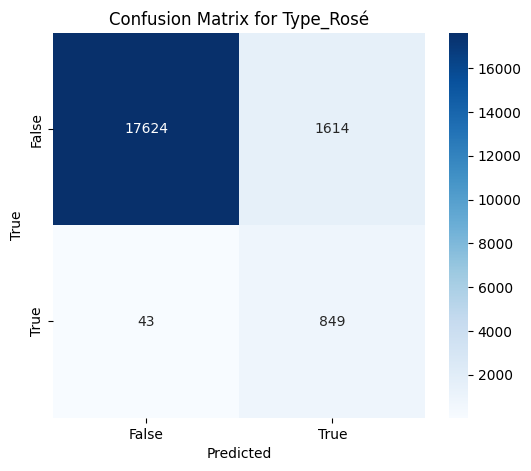

Training model for target: Type_Sparkling
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Type_Sparkling: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Results for Type_Sparkling:
Accuracy: 0.9063
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.91      0.95     18677
        True       0.43      0.92      0.59      1453

    accuracy                           0.91     20130
   macro avg       0.71      0.91      0.77     20130
weighted avg       0.95      0.91      0.92     20130



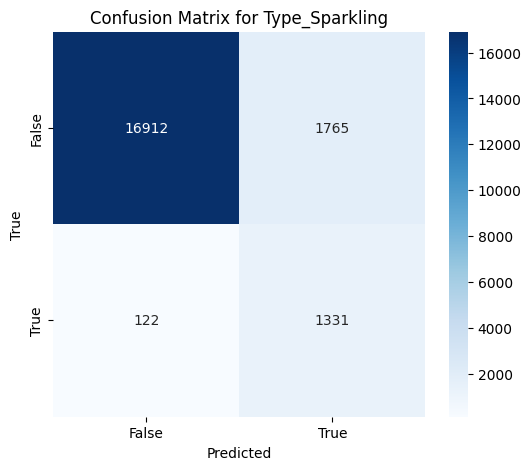

Training model for target: Type_White
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Type_White: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Results for Type_White:
Accuracy: 0.9429
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.93      0.96     14387
        True       0.84      0.98      0.91      5743

    accuracy                           0.94     20130
   macro avg       0.92      0.96      0.93     20130
weighted avg       0.95      0.94      0.94     20130



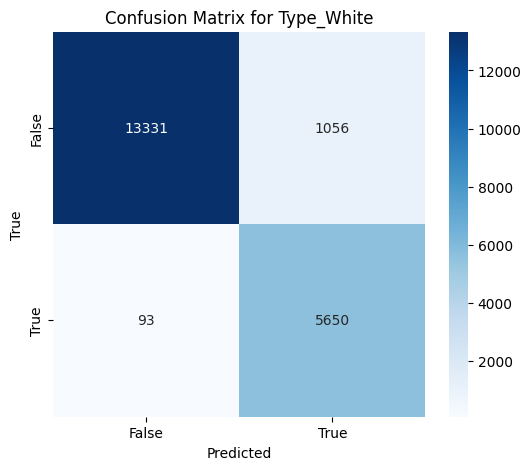

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE  # SMOTE is imported, ready to use

# Assuming 'encoded_df' is your dataframe after preprocessing

# Step 1: Define the target columns (all columns starting with 'Type_')
target_columns = [col for col in encoded_df.columns if col.startswith('Type_')]

# Step 2: Define the feature columns (all columns starting with 'Harmonize_')
feature_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]

# Step 3: Create a preprocessing pipeline for numerical and categorical features
categorical_columns = [col for col in feature_columns if encoded_df[col].dtype == 'object']
numerical_columns = [col for col in feature_columns if encoded_df[col].dtype != 'object']

# Preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Step 4: Loop through each target column and train a model for each target (wine type)
for target_column in target_columns:
    print(f"Training model for target: {target_column}")
    
    # Step 5: Prepare features and target
    features = encoded_df[feature_columns]
    target = encoded_df[target_column]
    
    # Step 6: Convert boolean columns to integers (0 or 1) if necessary
    features = features.apply(lambda col: col.map({True: 1, False: 0}) if col.dtype == 'bool' else col)

    # Step 7: Split the dataset into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    
    # Step 8: Apply SMOTE in the preprocessing pipeline - **commented out**
    # smote = SMOTE(random_state=42)  
    # X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # SMOTE applied only to training data
    
    # Step 9: If SMOTE is not used, use the original training data (X_train, y_train)
    # If SMOTE is needed, uncomment the above lines and this will be replaced by the resampled data
    X_resampled, y_resampled = X_train, y_train  # Default: No resampling
    
    # Step 10: Create a Random Forest pipeline (combine preprocessor with model)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
    ])
    
    # Step 11: Hyperparameter tuning using GridSearchCV
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__max_features': ['sqrt', 'log2', None]  # Corrected valid values
    }
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
    
    # Step 12: Train the model with GridSearchCV
    grid_search.fit(X_resampled, y_resampled)
    
    # Step 13: Best model
    print(f"Best parameters for {target_column}: {grid_search.best_params_}")
    
    # Step 14: Make predictions on the test set
    y_pred = grid_search.predict(X_test)
    
    # Step 15: Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Step 16: Print results
    print(f"Results for {target_column}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_rep}")
    
    # Step 17: Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {target_column}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Model Evaluation and Conclusions

### 1. **Target: Type_Dessert**
- **Accuracy**: 82.41%
- **Key Findings**:
  - The model performs excellently for the majority class ("False") with very high precision (1.00), but struggles with the minority class ("True"), showing very low precision (0.10) and a low F1-score (0.19).
  - Class imbalance is still evident, with the majority class dominating predictions.
  - **Recommendation**: Focus on improving the model's ability to predict the minority class (True) without compromising performance on the majority class.

---

### 2. **Target: Type_Dessert/Port**
- **Accuracy**: 97.65%
- **Key Findings**:
  - The model achieves high accuracy and precision for the majority class ("False") but has low precision (0.29) for the minority class ("True").
  - Recall for the "True" class is very high (0.96), indicating that the model identifies the minority class well, but the low precision indicates a high number of false positives.
  - **Recommendation**: Focus on improving precision for the "True" class while maintaining high recall.

---

### 3. **Target: Type_Red**
- **Accuracy**: 96.27%
- **Key Findings**:
  - The model performs well for both the "False" and "True" classes with balanced precision and recall.
  - High F1-scores for both classes indicate that the model has learned to handle the class imbalance effectively.
  - **Recommendation**: No immediate improvements are needed, but there could still be potential for further fine-tuning to optimize precision on the "False" class.

---

### 4. **Target: Type_Rosé**
- **Accuracy**: 91.77%
- **Key Findings**:
  - High precision for "False" but very low precision for "True".
  - While recall for "True" is high (0.95), the low precision (0.34) and low F1-score (0.51) indicate room for improvement in identifying the "True" class without many false positives.
  - **Recommendation**: Improve the balance between recall and precision for the "True" class.

---

### 5. **Target: Type_Sparkling**
- **Accuracy**: 90.63%
- **Key Findings**:
  - The model is better at predicting the "False" class, with high precision (0.99) and decent recall for the "True" class.
  - However, the F1-score for the "True" class is still low (0.59) due to the class imbalance.
  - **Recommendation**: Focus on improving the performance of the model for the "True" class while maintaining good recall for the "False" class.

---

### 6. **Target: Type_White**
- **Accuracy**: 94.29%
- **Key Findings**:
  - High precision for both classes with a notable improvement in predicting the minority class ("True").
  - Recall for "True" is very high (0.98) and the F1-score (0.91) indicates balanced performance.
  - **Recommendation**: Continue fine-tuning the model to maintain high precision and recall for both classes.

---

### **General Conclusion**:
- **Class Imbalance**: All models still exhibit some degree of bias towards the majority class ("False") due to class imbalance.
- **Next Steps**:
  - **Hyperparameter Tuning**: Continue fine-tuning the hyperparameters, particularly `max_features`, `min_samples_split`, and `n_estimators`, to further improve performance.
  - **Class Imbalance Solutions**: Since SMOTE was excluded from the preprocessing, techniques like adjusting class weights or exploring undersampling methods could help address the imbalance.
  - **Threshold Optimization**: Explore optimizing the decision threshold for classification to balance precision and recall, especially for the minority class.

# Support Vector Regression (SVR) for Wine Price Prediction: Model Performance & Results - Task [091]

Missing values in 'Price' column: 11
       C  epsilon  kernel        MAE        R2
0      1     0.01  linear  13.576430  0.041981
1      1     0.01     rbf  13.160953  0.008753
2      1     0.01    poly  13.862439 -0.060098
3      1     0.10  linear  13.574889  0.042551
4      1     0.10     rbf  13.160203  0.008234
5      1     0.10    poly  13.863010 -0.058631
6      1     0.20  linear  13.573174  0.043156
7      1     0.20     rbf  13.156897  0.007631
8      1     0.20    poly  13.866505 -0.056943
9     10     0.01  linear  13.525914  0.042034
10    10     0.01     rbf  13.146444  0.053316
11    10     0.01    poly  13.935791 -0.033637
12    10     0.10  linear  13.525556  0.042664
13    10     0.10     rbf  13.151409  0.052860
14    10     0.10    poly  13.926626 -0.034081
15    10     0.20  linear  13.525183  0.043341
16    10     0.20     rbf  13.155615  0.052324
17    10     0.20    poly  13.906888 -0.034970
18   100     0.01  linear  13.525918  0.042033
19   100     0.01     r

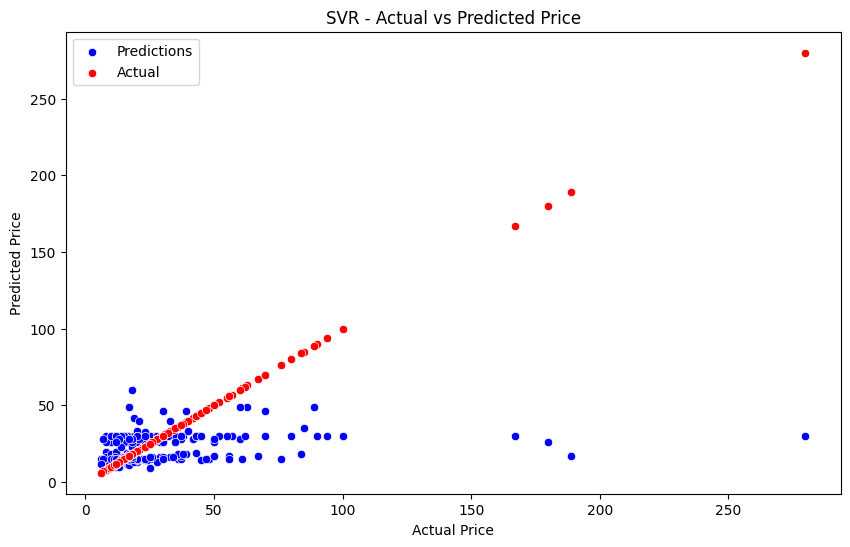

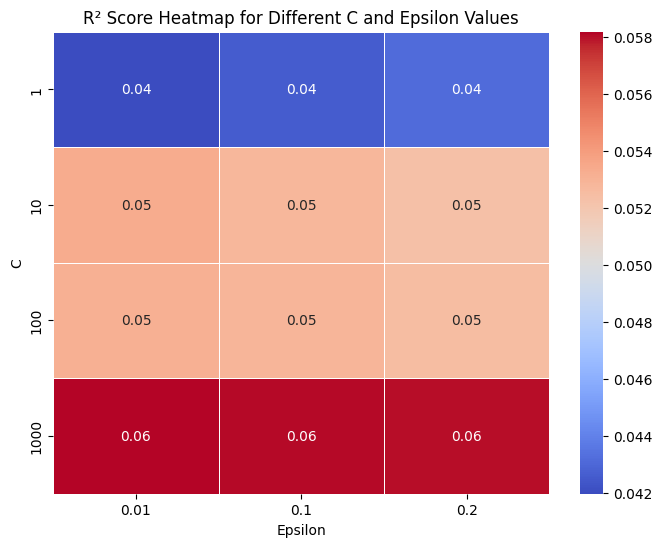

In [16]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../datasets/WineDataset.csv')

# Clean the 'Price' column (remove currency symbol, commas, and text like 'per bottle')
df['Price'] = df['Price'].replace({'Â£': '', ',': '', ' per bottle': ''}, regex=True)

# Convert the 'Price' column to numeric, coercing errors to NaN (for any unexpected text)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Check for and handle missing values in the 'Price' column
missing_values = df['Price'].isnull().sum()
print(f"Missing values in 'Price' column: {missing_values}")

# Impute missing values for 'Price' with the median value
df['Price'] = df['Price'].fillna(df['Price'].median())

# Feature columns (Grape, Type)
categorical_features = ['Grape', 'Type']
y = df['Price']

# Step 1: One-Hot Encode the categorical features ('Grape', 'Type')
X_categorical = df[categorical_features]
X_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Step 2: Standardize the data (important for SVR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 3: Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Hyperparameter Tuning with Loop for different values of 'C', 'epsilon', and 'kernel'
results = []

C_values = [1, 10, 100, 1000]
epsilon_values = [0.01, 0.1, 0.2]
kernels = ['linear', 'rbf', 'poly']

for C in C_values:
    for epsilon in epsilon_values:
        for kernel in kernels:
            # Initialize the SVR model with current hyperparameters
            svr_model = SVR(C=C, epsilon=epsilon, kernel=kernel)
            
            # Train the model
            svr_model.fit(X_train, y_train)
            
            # Predict on the test set
            y_pred = svr_model.predict(X_test)
            
            # Evaluate the model's performance
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            # Store the results
            results.append({
                'C': C,
                'epsilon': epsilon,
                'kernel': kernel,
                'MAE': mae,
                'R2': r2
            })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

# Step 5: Find the best parameters from the results
best_params = results_df.loc[results_df['R2'].idxmax()]
print(f"Best parameters: C={best_params['C']}, epsilon={best_params['epsilon']}, kernel={best_params['kernel']}")
print(f"Best R² Score: {best_params['R2']}")

# Step 6: Visualizing the results - Actual vs Predicted Price for the best model
best_model = SVR(C=best_params['C'], epsilon=best_params['epsilon'], kernel=best_params['kernel'])
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, color='blue', label='Predictions')
sns.scatterplot(x=y_test, y=y_test, color='red', label='Actual')
plt.title('SVR - Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# Step 7: Plot the results from grid search (C vs epsilon vs R2 Score)
pivot_table = results_df.pivot_table(index='C', columns='epsilon', values='R2', aggfunc='max')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('R² Score Heatmap for Different C and Epsilon Values')
plt.xlabel('Epsilon')
plt.ylabel('C')
plt.show()

## Conclusion

Based on the results of the **Support Vector Regression (SVR)** model with various hyperparameters, the following conclusions can be made:

### Best Model Parameters:
- The best performing model used the following hyperparameters:
  - **C**: 1000
  - **Epsilon**: 0.01
  - **Kernel**: Radial Basis Function (RBF)

### Model Performance:
- The **R² score** for the best model is **0.0582**. This indicates that the model explains only **5.8%** of the variance in the target variable (Price), suggesting that the model has a relatively poor fit to the data.
- The **Mean Absolute Error (MAE)** is approximately **13.34**, meaning the model’s predictions deviate by about **13.34 units** on average, which could be significant depending on the scale of wine prices.

### Model Evaluation:
- Despite tuning the hyperparameters, the performance of the model remains modest, as indicated by the low R² score and moderate MAE.
- The R² score close to zero implies that there is little to no correlation between the features (Grape and Type) and the price of the wine. This suggests that other factors, not included in the model, could have a significant impact on wine pricing.

### Possible Improvements:
- Including additional features (e.g., alcohol content, region, year of production) could enhance the model's predictive power.
- More advanced techniques such as **feature engineering** might reveal hidden relationships in the data.
- Exploring other machine learning models (e.g., Random Forest, Gradient Boosting) or ensemble methods could lead to better results.

### Summary:
In conclusion, the **SVR model** with the best hyperparameters offers some predictive capability but does not adequately explain the variance in wine prices. To improve its accuracy, further refinement of the model, the inclusion of additional features, or the use of different algorithms is recommended.

---

### Explanation for the Context:

**SVR (Support Vector Regression)** is a type of machine learning model used to predict continuous values. 

- **Target**: In this case, the target variable is the **price of wine**.
- **Variables**: The model uses the **grape variety** and **type of wine** as input features to predict the price of the wine.

In summary, this model attempts to predict the price of wine based on its **grape variety** and **type**, but the results indicate that these features alone are not sufficient to explain the variation in wine prices.